# Plots.jl

In [1]:
using DataFrames
using RDatasets
using Plots
using StatsBase
using StatsPlots
using ColorSchemes

## Line plots

In [2]:
domain = LinRange(0, 2π, 100)

100-element LinRange{Float64, Int64}:
 0.0, 0.0634665, 0.126933, 0.1904, …, 6.09279, 6.15625, 6.21972, 6.28319

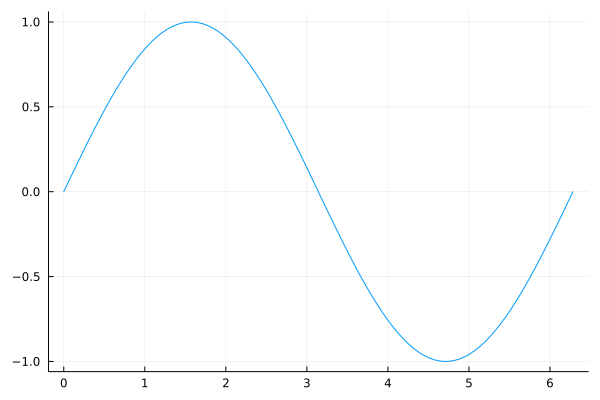

In [3]:
# Basic (line) plot
plot(domain, sin.(domain), label=false)

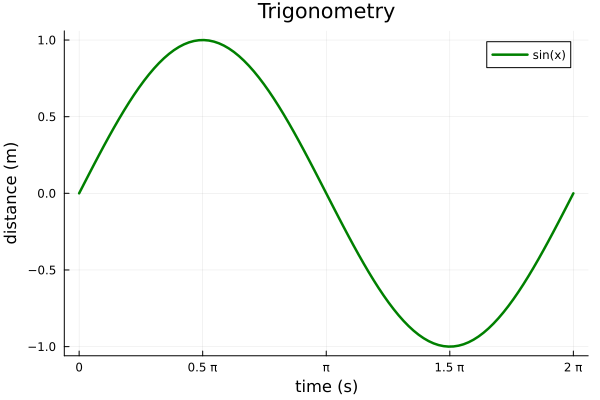

In [4]:
# Customize plot
plot(
    domain, 
    sin.(domain), 
    title = "Trigonometry", 
    label = "sin(x)", 
    xlabel = "time (s)", 
    ylabel = "distance (m)", 
    xticks = ([0, π/2, π, 3π/2, 2π], ["0", "0.5 π", "π", "1.5 π", "2 π"]),
    linewidth = 2.5, 
    linecolor = "green", 
    )


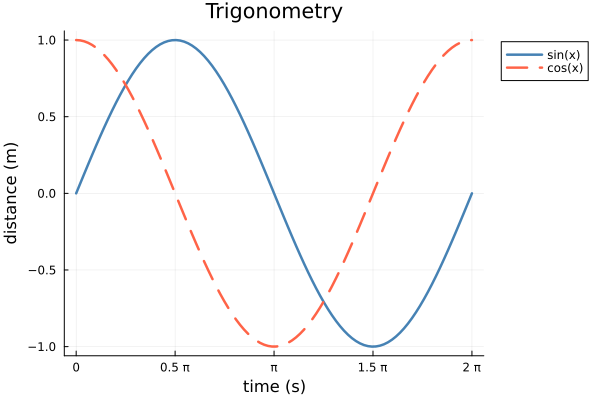

In [5]:
# Modify plot (add cosinus)
plot(
    domain, 
    sin.(domain), 
    title = "Trigonometry", 
    label = "sin(x)", 
    xlabel = "time (s)", 
    ylabel = "distance (m)", 
    xticks = ([0, π/2, π, 3π/2, 2π], ["0", "0.5 π", "π", "1.5 π", "2 π"]), 
    linewidth = 2.5, 
    linecolor = :steelblue, # symbol notation
    )

plot!(
    domain, 
    cos.(domain), 
    label = "cos(x)", 
    linewidth = 2.5, 
    linecolor = "#FF6347", # HTML color code
    linestyle = :dash, 
    legend_position = :outertopright, # or alias "legend"
    )

Named colors:
- http://juliagraphics.github.io/Colors.jl/stable/namedcolors/
- https://en.wikipedia.org/wiki/X11_color_names
- https://github.com/JuliaGraphics/Colors.jl/blob/master/src/names_data.jl

HTML colors:
- https://htmlcolorcodes.com/color-picker

Line styles:
- https://docs.juliaplots.org/latest/generated/attributes_series

Legend positions:
- https://docs.juliaplots.org/latest/generated/attributes_subplot/
  - :best
  - :left, :right
  - :top, :bottom
  - :topleft, topright
  - :bottomleft, bottomright
  - :inside
  - :outerleft, :outerright
  - :outertopleft, outertopright
  - :outerbottomleft, outerbottomright


## Subplots

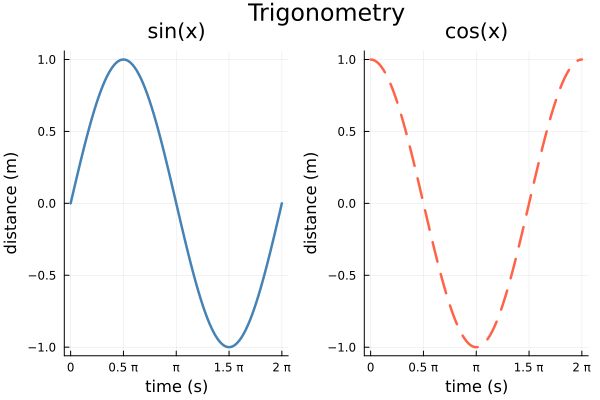

In [6]:
# Subplots (horizontal)
p1 = plot(
    domain, 
    sin.(domain), 
    title = "sin(x)", 
    label = false, 
    xlabel = "time (s)", 
    ylabel = "distance (m)", 
    xticks = ([0, π/2, π, 3π/2, 2π], ["0", "0.5 π", "π", "1.5 π", "2 π"]), 
    linewidth = 2.5, 
    linecolor = :steelblue, 
    linestyle = :solid, 
    legend_position = :bottomleft, 
    )

p2 = plot(
    domain, 
    cos.(domain), 
    title = "cos(x)", 
    label = false, 
    xlabel = "time (s)", 
    ylabel = "distance (m)", 
    xticks = ([0, π/2, π, 3π/2, 2π], ["0", "0.5 π", "π", "1.5 π", "2 π"]), 
    linewidth = 2.5, 
    linecolor = "#FF6347", 
    linestyle = :dash, 
    legend_position = :bottomleft, 
    )

plot(
    p1, p2, 
    layout = (1, 2), # 1 row, 2 columns
    plot_title = "Trigonometry", 
)


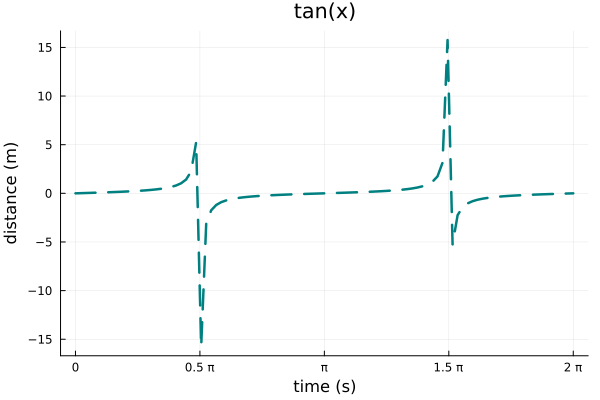

In [7]:
p3 = plot(
    domain, 
    0.25 .* tan.(domain), 
    title = "tan(x)", 
    label = false, 
    xlabel = "time (s)", 
    ylabel = "distance (m)", 
    xticks = ([0, π/2, π, 3π/2, 2π], ["0", "0.5 π", "π", "1.5 π", "2 π"]), 
    linewidth = 2.5, 
    linecolor = :teal, 
    linestyle = :dash, 
    legend_position = :bottomleft, 
    )

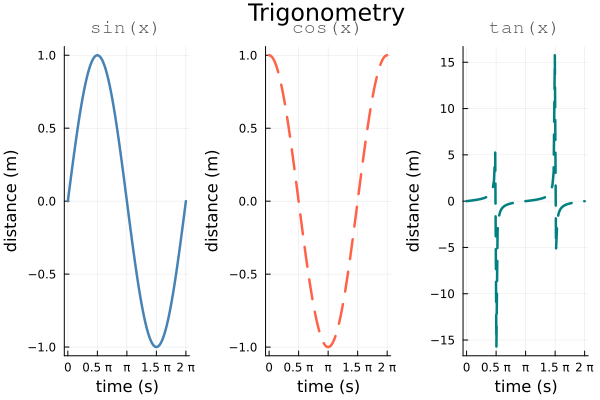

In [8]:
plot(
    p1, p2, p3, 
    layout = (1, 3), # 1 row, 3 columns
    plot_title = "Trigonometry", 
    titlefontfamily = "courier", # title font family subplots
    titlefontcolor = :darkgray, # title font color subplots
    titlefontsize = 10,  # title font size subplots
)

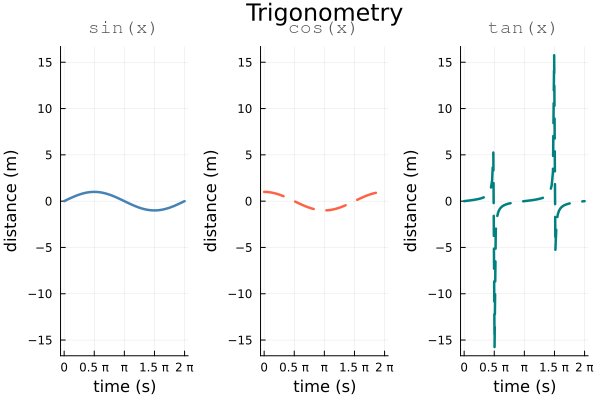

In [9]:
# Link axis
plot(
    p1, p2, p3, 
    layout = (1, 3), # 1 row, 3 columns
    plot_title = "Trigonometry", 
    titlefontfamily = "courier", # title font family subplots
    titlefontcolor = :darkgray, # title font color subplots
    titlefontsize = 10,  # title font size subplots
    link = :y, 
)

## Scatter plots

In [10]:
# iris dataset
iris = dataset("datasets", "iris");

In [11]:
# first rows
first(iris, 5)

5×5 DataFrame
 Row │ SepalLength  SepalWidth  PetalLength  PetalWidth  Species 
     │ Float64      Float64     Float64      Float64     Cat…    
─────┼───────────────────────────────────────────────────────────
   1 │         5.1         3.5          1.4         0.2  setosa
   2 │         4.9         3.0          1.4         0.2  setosa
   3 │         4.7         3.2          1.3         0.2  setosa
   4 │         4.6         3.1          1.5         0.2  setosa
   5 │         5.0         3.6          1.4         0.2  setosa

In [12]:
# sample 5 rows
iris[sample(1:nrow(iris), 5, replace = false), :]

5×5 DataFrame
 Row │ SepalLength  SepalWidth  PetalLength  PetalWidth  Species    
     │ Float64      Float64     Float64      Float64     Cat…       
─────┼──────────────────────────────────────────────────────────────
   1 │         6.7         3.3          5.7         2.5  virginica
   2 │         6.0         2.9          4.5         1.5  versicolor
   3 │         4.6         3.1          1.5         0.2  setosa
   4 │         6.4         2.7          5.3         1.9  virginica
   5 │         5.6         2.8          4.9         2.0  virginica

In [14]:
# descrine dataset
describe(iris)

5×7 DataFrame
 Row │ variable     mean     min     median  max        nmissing  eltype       ⋯
     │ Symbol       Union…   Any     Union…  Any        Int64     DataType     ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ SepalLength  5.84333  4.3     5.8     7.9               0  Float64      ⋯
   2 │ SepalWidth   3.05733  2.0     3.0     4.4               0  Float64
   3 │ PetalLength  3.758    1.0     4.35    6.9               0  Float64
   4 │ PetalWidth   1.19933  0.1     1.3     2.5               0  Float64
   5 │ Species               setosa          virginica         0  CategoricalV ⋯
                                                                1 column omitted

In [15]:
# levels of categorical vector
levels(iris.Species)

3-element Vector{String}:
 "setosa"
 "versicolor"
 "virginica"

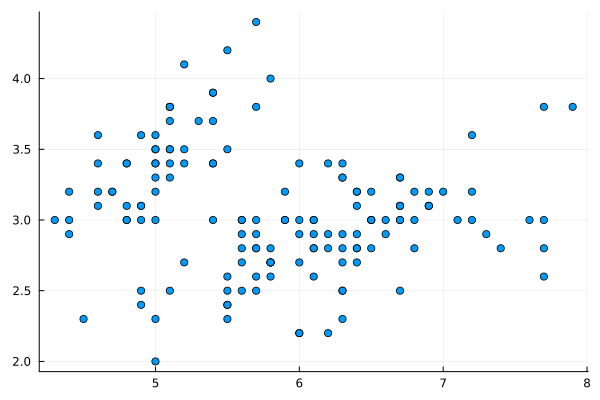

In [16]:
# basic scatter plot
scatter(
    iris.SepalLength, 
    iris.SepalWidth, 
    label=false
)

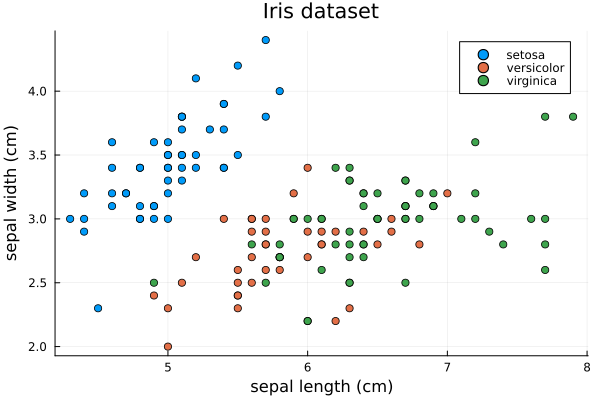

In [17]:
# group values
scatter(
    iris.SepalLength, 
    iris.SepalWidth, 
    xlabel = "sepal length (cm)", 
    ylabel = "sepal width (cm)", 
    title = "Iris dataset", 
    group = iris.Species, 
)

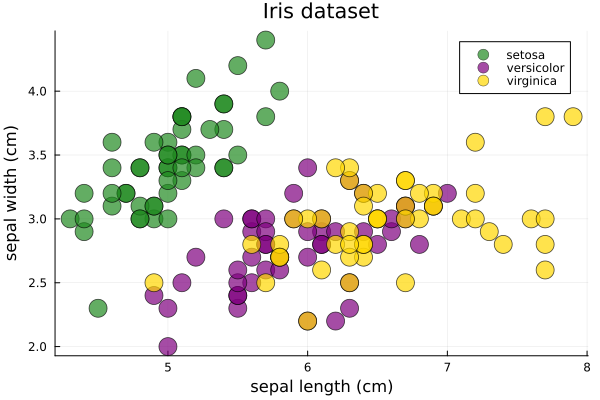

In [18]:
# markercolor, marksize and alpha
scatter(
    iris.SepalLength, 
    iris.SepalWidth, 
    xlabel = "sepal length (cm)", 
    ylabel = "sepal width (cm)", 
    title = "Iris dataset", 
    group = iris.Species, 
    markercolor = [:forestgreen :purple :gold], 
    markersize = 10, 
    alpha = .7, 
)

In [19]:
# color schemes (pre-defined)
keys(colorschemes)

KeySet for a Dict{Symbol, ColorScheme} with 1190 entries. Keys:
  :tableau_colorblind
  :Rushmore1
  :flag_kw
  :managua100
  :broc
  :flag_usco
  :Monet
  :PRGn_3
  :flag_mf
  :tableau_winter
  :Set2_3
  :davos50
  :flag_usut
  :tableau_miller_stone
  :flag_gl
  :rembrandt
  :Pastel2_3
  :PiYG_10
  :fastie
  ⋮

In [20]:
findcolorscheme("seaborn");


colorschemes containing "seaborn"

  seaborn_dark6       
  seaborn_icefire_gradient
  seaborn_deep        
  seaborn_pastel      
  seaborn_pastel6     
  seaborn_muted       
  seaborn_colorblind  
  seaborn_deep6       
  seaborn_rocket_gradient
  seaborn_muted6      
  seaborn_bright      
  seaborn_bright6     
  seaborn_colorblind6 
  seaborn_dark        


 ...found 14 results for "seaborn"


In [21]:
ColorSchemes.seaborn_deep

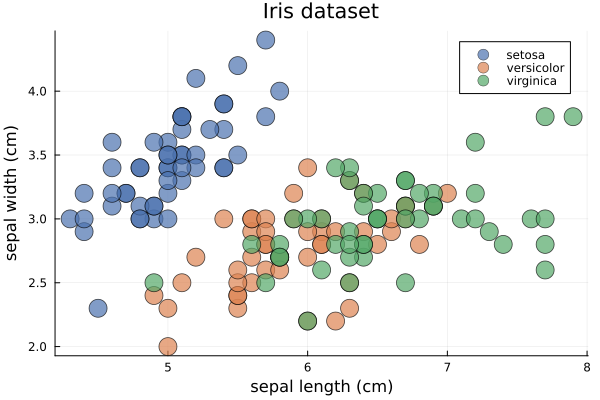

In [22]:
# color palette
scatter(
    iris.SepalLength, 
    iris.SepalWidth, 
    xlabel = "sepal length (cm)", 
    ylabel = "sepal width (cm)", 
    title = "Iris dataset", 
    group = iris.Species, 
    markersize = 10, 
    palette = :seaborn_deep, 
    alpha = .7, 
)

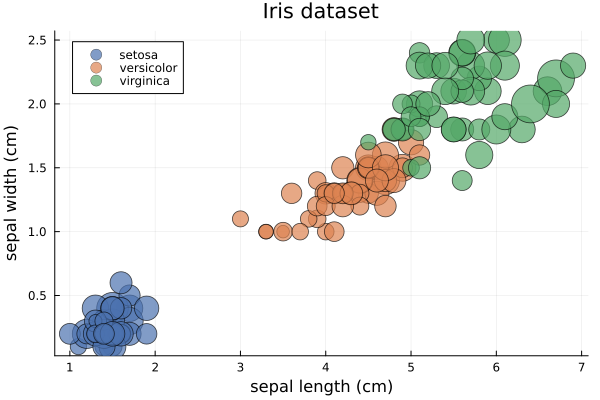

In [23]:
# Markersize based on variable value(s)
scatter(
    iris.PetalLength, 
    iris.PetalWidth, 
    xlabel = "sepal length (cm)", 
    ylabel = "sepal width (cm)", 
    title = "Iris dataset", 
    group = iris.Species, 
    markersize = .7 .* iris.SepalLength .* iris.SepalWidth, 
    palette = :seaborn_deep, 
    alpha = .7, 
    legend_position = :topleft, 
)

## Histograms

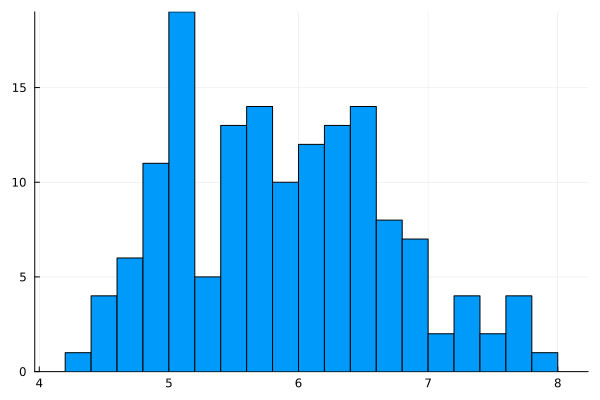

In [24]:
histogram(iris.SepalLength, bins=20, label=false)

https://github.com/JuliaPlots/StatsPlots.jl#grouped-histograms

## Boxplot

In [25]:
y = rand(100, 4); # Four series of 100 points each

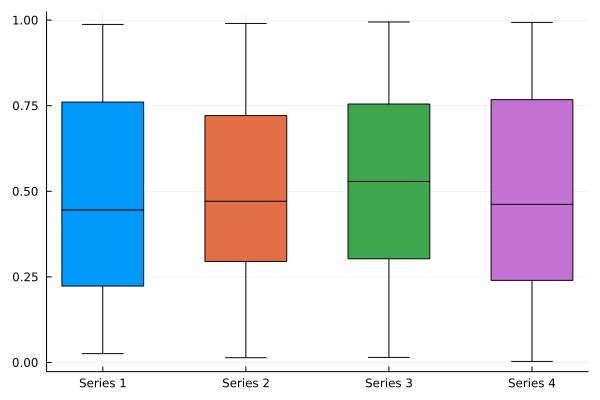

In [26]:
boxplot(["Series 1" "Series 2" "Series 3" "Series 4"], y, leg = false)

## Violin

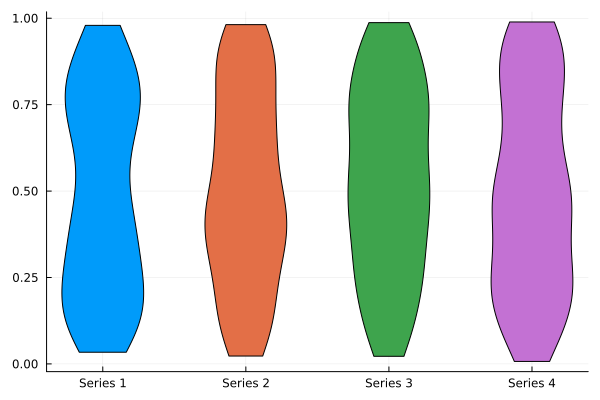

In [27]:
violin(["Series 1" "Series 2" "Series 3" "Series 4"], y, leg = false)

## Boxplot and Violin

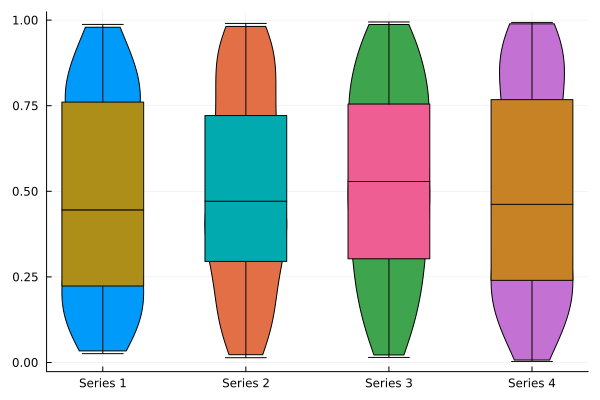

In [28]:
violin(["Series 1" "Series 2" "Series 3" "Series 4"], y, leg = false)
boxplot!(["Series 1" "Series 2" "Series 3" "Series 4"], y, leg = false)

## Density

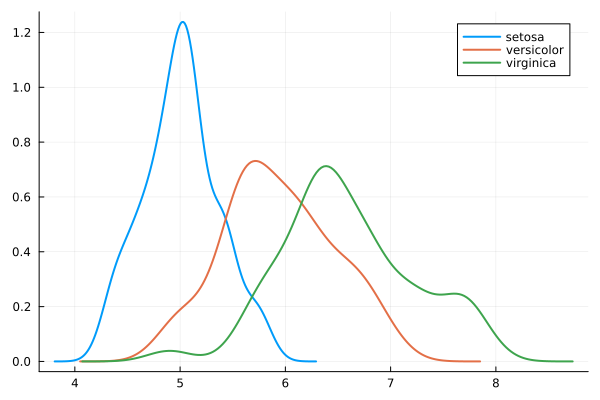

In [29]:
density(iris.SepalLength, group = iris.Species, linewidth = 2)

## Marginal KDE

┌ Warning: Keyword argument `orientation` is deprecated.
│ Please use `permute` instead.
└ @ Plots /Users/rene/.julia/packages/Plots/HyyIK/src/args.jl:1552


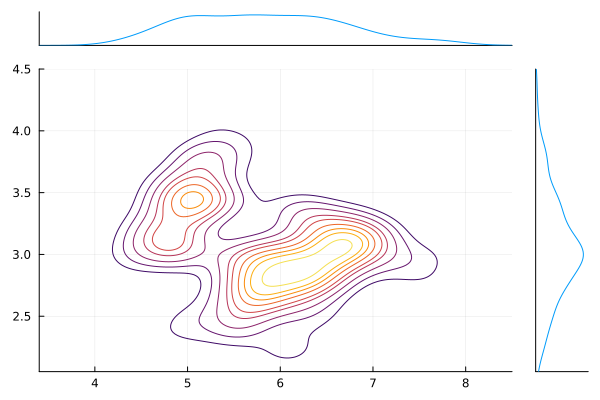

In [30]:
marginalkde(iris.SepalLength, iris.SepalWidth)

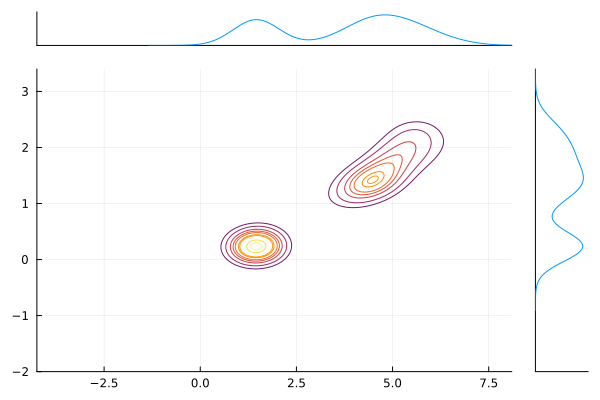

In [31]:
marginalkde(iris.PetalLength, iris.PetalWidth)

## Recipies

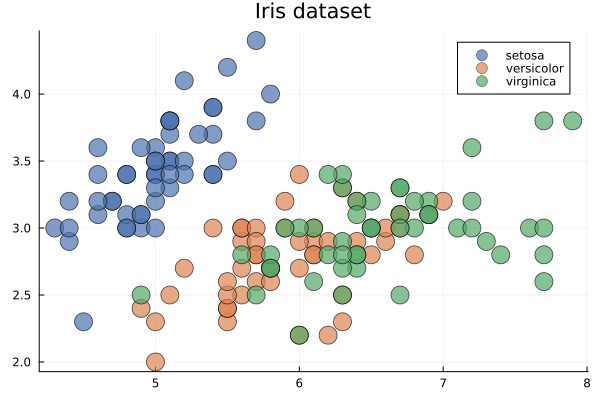

In [32]:
@df iris scatter(
    :SepalLength, 
    :SepalWidth, 
    group = :Species, 
    title = "Iris dataset", 
    palette = :seaborn_deep, 
    markersize = 10, 
    alpha = .7, 
    )

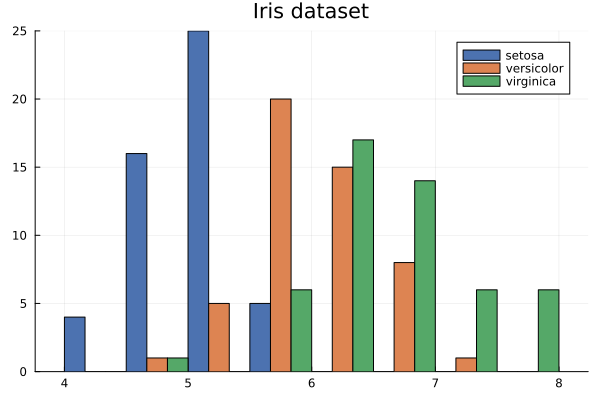

In [33]:
@df iris groupedhist(
    :SepalLength, 
    group = :Species, 
    title = "Iris dataset", 
    palette = :seaborn_deep, 
    bar_position = :dodge, 
    )

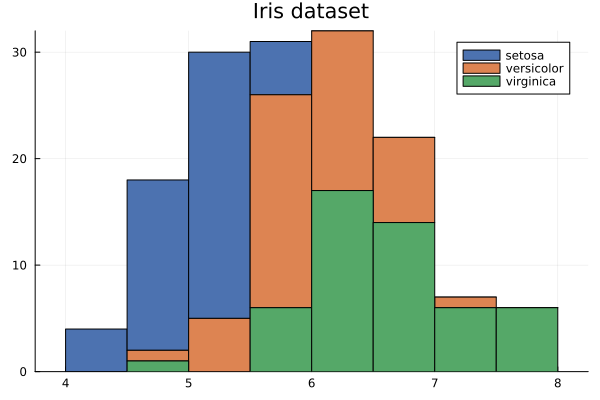

In [34]:
@df iris groupedhist(
    :SepalLength, 
    group = :Species, 
    title = "Iris dataset", 
    palette = :seaborn_deep, 
    bar_position = :stack, 
    )

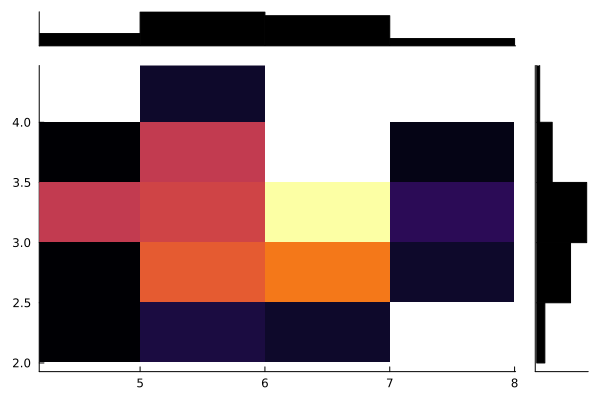

In [35]:
@df iris marginalhist(:SepalLength, :SepalWidth)

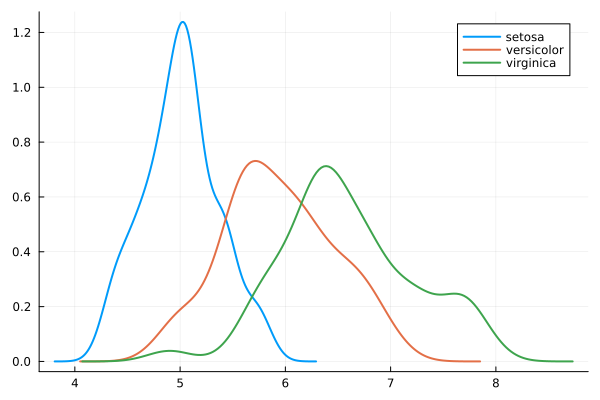

In [36]:
@df iris density(:SepalLength, group = :Species, linewidth = 2)

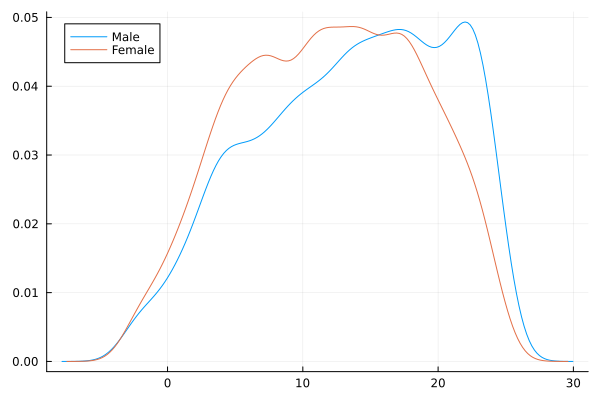

In [37]:
school = RDatasets.dataset("mlmRev","Hsb82")
@df school density(:MAch, group = :Sx)

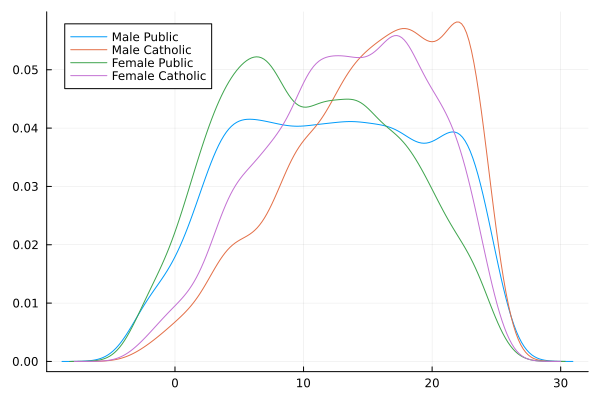

In [38]:
# To group by more than one column, use a tuple of symbols
@df school density(:MAch, group = (:Sx, :Sector), legend = :topleft)